<a href="https://colab.research.google.com/github/rahiakela/edureka-deep-learning-with-tensorflow/blob/module-3-deep-dive-into-neural-networks-with-tensorFlow/module_3_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3 Assignment: Deep dive into Neural Networks with Tensorflow

## Module 3: Assignment

**Analyse the information given in the following ‘Wines’ dataset and classify the wine based on their place of origin.**

This data contains the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

Data variables:
* Alcohol
* Malic acid
* Ash
* Alkalinity of ash
* Magnesium
* Total phenols
* Flavanoids
* Nonflavanoid phenols
* Proanthocyanins
* Color intensity
* Hue
* OD280/OD315 of diluted wines
* Proline

The dataset for the ‘Wines’ looks like this:

<img src='https://github.com/rahiakela/img-repo/blob/master/wine-dataset.png?raw=1' width='800'/>


Dataset download link:
https://www.edureka.co/medias/giu1bur0kw/download?media_file_id=254929809

## Setup

In [0]:
import pandas as pd
import numpy as np

In [43]:
df = pd.read_csv('wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [44]:
df.shape

(178, 14)

In [47]:
X = df[df.columns[1:13]]
X.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93


In [48]:
# normize the feature column
def feature_normalize(dataset):
  mu = np.mean(dataset,axis=0)
  sigma = np.std(dataset,axis=0)
  return (dataset - mu)/sigma
X = feature_normalize(X)
X.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601


In [49]:
X = X.values
y = df[df.columns[0]]
print(X.shape, y.shape)

(178, 12) (178,)


In [50]:
len(np.unique(y))

3

In [51]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded[:10])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [60]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Shuffle the dataset to mix up the rows.
X, Y = shuffle(X, onehot_encoded, random_state=1)

# Convert the dataset into train and test part
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state=415)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(142, 12)
(142, 3)
(36, 12)
(36, 3)


In [59]:
def append_bias_reshape(features,labels):
  n_training_samples = features.shape[0]
  n_target_samples = labels.shape[0]
  n_dim = features.shape[1]
  n_y_dim = labels.shape[1]
  f = np.reshape(np.c_[np.ones(n_training_samples), features], [n_training_samples, n_dim + 1])
  # l = np.reshape(labels, [n_training_samples, 1])
  l = np.reshape(np.c_[np.ones(n_target_samples), labels], [n_target_samples, n_y_dim + 1])
  return f, l

f, l = append_bias_reshape(train_x, train_y)
n_dim = f.shape[1]
print(f'train_x shape: {f.shape}')
print(f'train_y shape: {l.shape}')
print(f'n_dim shape: {n_dim}')

train_x shape: (142, 13)
train_y shape: (142, 4)
n_dim shape: 13


In [62]:
import tensorflow as tf
import matplotlib.pyplot as plt

epoch :  0  -  cost:  1.0918262
epoch :  1  -  cost:  1.0857441
epoch :  2  -  cost:  1.0802628
epoch :  3  -  cost:  1.0752978
epoch :  4  -  cost:  1.0707804
epoch :  5  -  cost:  1.0666531
epoch :  6  -  cost:  1.0628681
epoch :  7  -  cost:  1.0593855
epoch :  8  -  cost:  1.0561711
epoch :  9  -  cost:  1.053196
epoch :  10  -  cost:  1.0504352
epoch :  11  -  cost:  1.0478673
epoch :  12  -  cost:  1.0454735
epoch :  13  -  cost:  1.0432371
epoch :  14  -  cost:  1.0411439
epoch :  15  -  cost:  1.0391808
epoch :  16  -  cost:  1.0373366
epoch :  17  -  cost:  1.0356008
epoch :  18  -  cost:  1.0339645
epoch :  19  -  cost:  1.0324198
epoch :  20  -  cost:  1.0309589
epoch :  21  -  cost:  1.0295753
epoch :  22  -  cost:  1.0282634
epoch :  23  -  cost:  1.0270174
epoch :  24  -  cost:  1.0258324
epoch :  25  -  cost:  1.0247041
epoch :  26  -  cost:  1.0236284
epoch :  27  -  cost:  1.0226017
epoch :  28  -  cost:  1.0216203
epoch :  29  -  cost:  1.0206816
epoch :  30  -  cost:

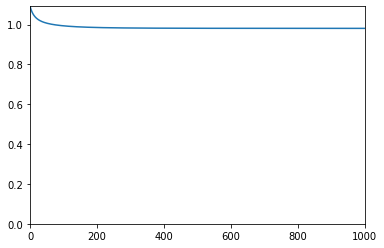

In [63]:
#define and initialize the variables to work with the tensors
learning_rate = 0.1
training_epochs = 1000
 
#Array to store cost obtained in each epoch
cost_history = np.empty(shape=[1],dtype=float)
 
n_dim = X.shape[1]
n_class = 3
 
x = tf.placeholder(tf.float32,[None,n_dim])
W = tf.Variable(tf.zeros([n_dim,n_class]))
b = tf.Variable(tf.zeros([n_class]))
 
#initialize all variables.
init = tf.global_variables_initializer()
 
#define the cost function
y_ = tf.placeholder(tf.float32,[None, n_class])
y = tf.nn.softmax(tf.matmul(x, W)+ b)
cost_function = tf.reduce_mean(-tf.reduce_sum((y_ * tf.log(y)),reduction_indices=[1]))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
 
#initialize the session
sess = tf.Session()
sess.run(init)
cost_history = []
 
#calculate the cost for each epoch
for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={x:train_x,y_:train_y})
    cost = sess.run(cost_function,feed_dict={x: train_x,y_: train_y})
    cost_history = np.append(cost_history, cost)
    print('epoch : ', epoch,  ' - ', 'cost: ', cost)
 
pred_y = sess.run(y, feed_dict={x: test_x})
 
#Calculate Accuracy
correct_prediction = tf.equal(tf.argmax(pred_y,1), tf.argmax(test_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(f'Accuracy:{sess.run(accuracy)}')
 
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()